In [ ]:
!pip install qiskit==1.4.2
!pip install qiskit_optimization
!pip install qiskit_algorithms


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 16.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 19.3 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.29.245-py3-none-any.whl size=685439 sha256=f974e815358e5c50d3

In [18]:
input_file_name = "/content/input.json"

import pandas as pd
import json
with open(input_file_name) as f:
  input_data = json.load(f)

data = input_data["data"]

input_data = data

num_assets=input_data['num_assets']
assets=input_data['assets']
#evaluation_date=input_data['evaluation_date']
df=pd.DataFrame()
series=[]
for asset in assets:
    series.append(pd.Series(assets[asset]['history'],name=asset))
df=pd.concat(series,axis=1)

df_cleaned = df.dropna(axis=1)
df_cleaned.head()
#we will not lose points

,AAL,AAON,AAPL,ABCL,ABNB,ABUS,ACAD,ACGL,ACHC,ACIW,...,YORW,Z,ZBRA,ZD,ZEUS,ZI,ZM,ZS,ZVRA,ZYME
2022-05-09,16.32,35.420815,149.855240,6.50,119.370003,2.23,16.379999,42.999634,66.139999,25.820000,...,37.117947,37.180000,328.540009,78.760002,29.565773,42.340000,92.339996,153.089996,4.14,5.44
2022-05-10,16.57,34.869923,152.269730,6.64,116.129997,1.98,16.840000,43.541645,66.940002,25.870001,...,36.818081,36.450001,325.839996,79.559998,29.845606,42.070000,90.680000,150.289993,4.35,5.61
2022-05-11,15.97,32.922142,144.375854,5.72,116.150002,2.06,15.290000,43.484589,66.370003,24.600000,...,37.445934,35.459999,314.500000,74.589996,29.285940,40.240002,84.800003,136.570007,4.02,5.16
2022-05-12,15.49,34.764999,140.492981,6.71,115.940002,2.06,16.030001,43.018650,67.650002,25.290001,...,37.380329,37.950001,316.720001,76.169998,28.977160,40.320000,84.970001,137.630005,4.24,5.21
2022-05-13,16.58,35.001091,144.977005,7.23,121.449997,2.31,16.850000,43.760349,70.589996,25.750000,...,37.183548,40.560001,336.859985,80.260002,29.768412,44.029999,94.839996,153.229996,4.10,5.55


In [20]:
from collections import defaultdict

#Lets do a bomb ass pre clustering algorithm based on the metadata

# Group tickers by sector
sector_assets = defaultdict(list)
sector_info = {}

for ticker, asset_data in assets.items():
    sector = asset_data.get("sector", "Unknown")
    sector_assets[sector].append(ticker)
    sector_info[ticker] = asset_data

# Create a DataFrame per sector
sector_dataframes = {}
for sector, tickers in sector_assets.items():
    sector_series = []
    for ticker in tickers:
        history = sector_info[ticker].get("history", {})
        series = pd.Series(history, name=ticker)
        sector_series.append(series)
    df_sector = pd.concat(sector_series, axis=1).dropna(axis=1)
    sector_dataframes[sector] = df_sector

# Print summary
print(f"Total sectors: {len(sector_dataframes)}")
print("Companies per sector:")
for sector, tickers in sector_assets.items():
    print(f"  {sector}: {len(tickers)} companies")

#Checking the dataframes
sector_dataframes["Technology"].head()


Total sectors: 11
Companies per sector:
  Industrials: 108 companies
  Technology: 234 companies
  Healthcare: 249 companies
  Consumer Cyclical: 96 companies
  Energy: 15 companies
  Financial Services: 44 companies
  Communication Services: 52 companies
  Utilities: 13 companies
  Consumer Defensive: 46 companies
  Basic Materials: 19 companies
  Real Estate: 19 companies


,AAPL,ACIW,ACLS,ACMR,ADBE,ADEA,ADI,ADP,ADSK,ADTN,...,VRNT,VRRM,VRSN,VSAT,WDAY,XRX,ZBRA,ZI,ZM,ZS
2022-05-09,149.855240,25.820000,54.540001,12.90,376.910004,6.315547,144.258743,196.904236,186.320007,16.782503,...,50.220001,12.78,164.860001,37.389999,176.210007,13.745799,328.540009,42.340000,92.339996,153.089996
2022-05-10,152.269730,25.870001,55.459999,12.39,393.029999,6.205958,147.072861,199.297592,186.410004,16.926685,...,49.849998,14.46,167.690002,36.410000,183.669998,13.833505,325.839996,42.070000,90.680000,150.289993
2022-05-11,144.375854,24.600000,53.080002,11.63,379.329987,6.177547,144.012405,195.721603,180.679993,16.830564,...,49.009998,13.97,166.940002,35.509998,173.139999,13.434844,314.500000,40.240002,84.800003,136.570007
2022-05-12,140.492981,25.290001,54.279999,12.44,388.489990,6.303371,144.865158,194.736099,185.050003,16.580654,...,48.369999,14.60,164.410004,36.220001,171.919998,13.379032,316.720001,40.320000,84.970001,137.630005
2022-05-13,144.977005,25.750000,58.650002,13.65,405.450012,6.611842,150.408112,195.965652,197.070007,16.897850,...,51.119999,14.88,165.110001,37.900002,182.289993,13.769719,336.859985,44.029999,94.839996,153.229996


In [25]:
from collections import defaultdict

# Agrupar tickers por industria
industry_assets = defaultdict(list)
industry_info = {}

for ticker, asset_data in assets.items():
    industry = asset_data.get("industry", "Unknown")
    industry_assets[industry].append(ticker)
    industry_info[ticker] = asset_data

# Crear un DataFrame por industria
industry_dataframes = {}
for industry, tickers in industry_assets.items():
    industry_series = []
    for ticker in tickers:
        history = industry_info[ticker].get("history", {})
        series = pd.Series(history, name=ticker)
        industry_series.append(series)
    df_industry = pd.concat(industry_series, axis=1).dropna(axis=1)
    industry_dataframes[industry] = df_industry

# Imprimir resumen
print(f"Total industries: {len(industry_dataframes)}")
print("Companies per industry:")
for industry, tickers in industry_assets.items():
    print(f"  {industry}: {len(tickers)} companies")

# Revisar un ejemplo
# Cambia "Airlines" por una industria que exista en tu dataset
industry_dataframes["Airlines"].head()


Total industries: 114
Companies per industry:
  Airlines: 7 companies
  Building Products & Equipment: 5 companies
  Consumer Electronics: 2 companies
  Biotechnology: 132 companies
  Travel Services: 5 companies
  Oil & Gas Equipment & Services: 5 companies
  Insurance - Diversified: 1 companies
  Medical Care Facilities: 13 companies
  Software - Infrastructure: 49 companies
  Semiconductor Equipment & Materials: 18 companies
  Software - Application: 65 companies
  Semiconductors: 33 companies
  Communication Equipment: 14 companies
  Advertising Agencies: 7 companies
  Electrical Equipment & Parts: 7 companies
  Utilities - Regulated Electric: 7 companies
  Medical Devices: 29 companies
  Medical Instruments & Supplies: 16 companies
  Healthcare Plans: 3 companies
  Drug Manufacturers - Specialty & Generic: 21 companies
  Electronic Components: 12 companies
  Drug Manufacturers - General: 3 companies
  Capital Markets: 7 companies
  Specialty Industrial Machinery: 8 companies
  Ins

,AAL,ALGT,JBLU,SKYW,SNCY,UAL,ULCC
2022-05-09,16.32,136.987518,9.88,25.590000,24.170000,43.310001,8.725
2022-05-10,16.57,137.171188,10.04,26.250000,24.150000,44.119999,8.980
2022-05-11,15.97,136.842545,9.60,26.209999,23.090000,43.180000,8.630
2022-05-12,15.49,134.387543,9.58,25.580000,22.280001,41.500000,8.340
2022-05-13,16.58,138.118393,10.06,26.240000,23.430000,43.270000,8.720


2022-05-13    36.613125
2022-05-16    37.226761
2022-05-17    37.275953
2022-05-18    35.921988
2022-05-19    36.355200
                ...    
2025-05-06    36.539286
2022-05-09    34.405404
2022-05-10    34.298151
2022-05-11    34.930950
2022-05-12    34.796961
Length: 751, dtype: float64


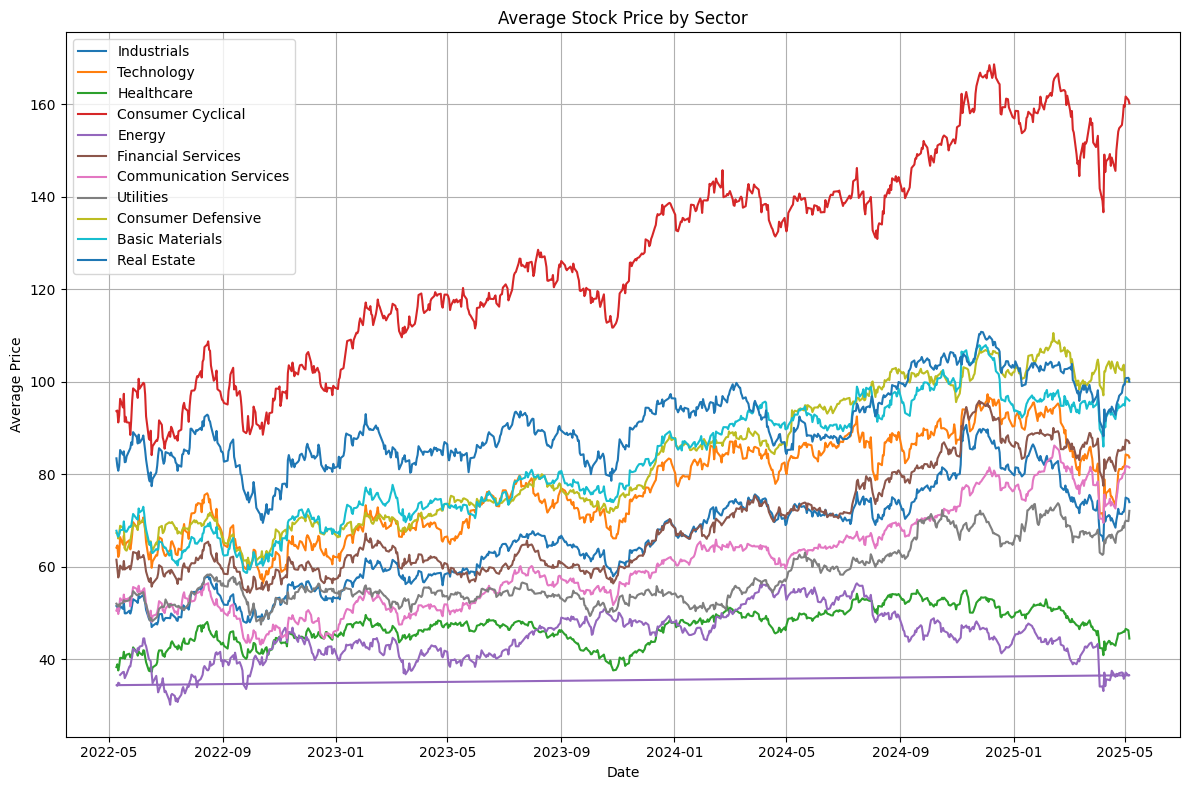

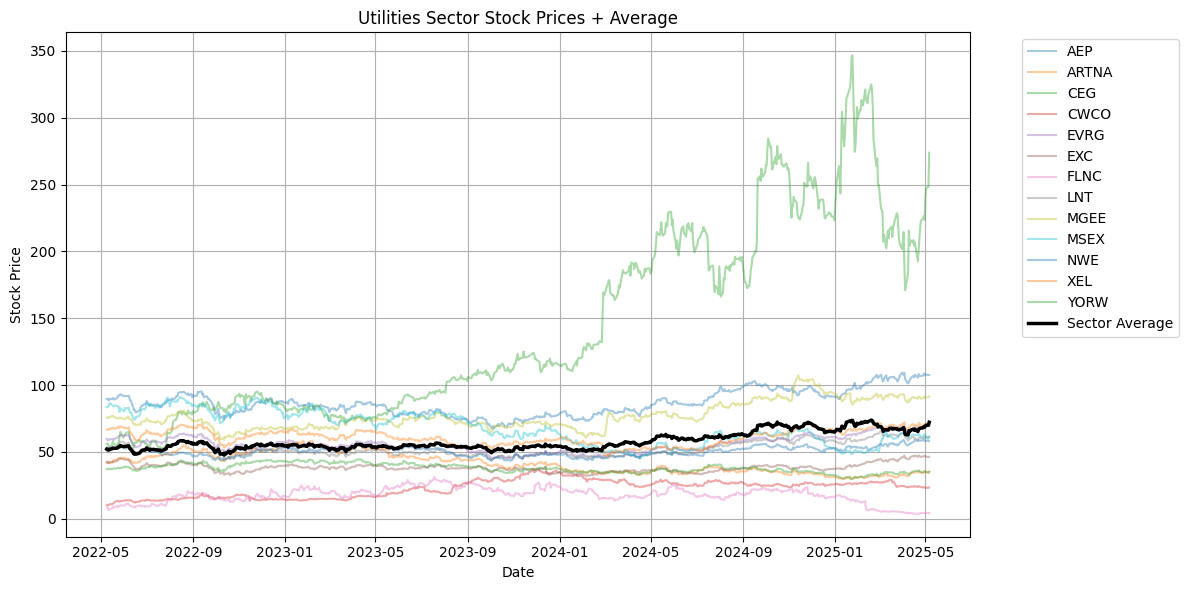

In [24]:
import matplotlib.pyplot as plt

# Compute average time series for each sector
sector_averages = {}

for sector, df_sector in sector_dataframes.items():
    df_sector.index = pd.to_datetime(df_sector.index)  # ensure datetime index
    sector_avg = df_sector.mean(axis=1)
    sector_averages[sector] = sector_avg

print(sector_averages["Energy"])

# Plot average stock price per sector
plt.figure(figsize=(12, 8))
for sector, avg_series in sector_averages.items():
    plt.plot(avg_series, label=sector)
plt.title("Average Stock Price by Sector")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot all companies + average for 'Utilities' sector
if "Utilities" in sector_dataframes:
    df_utilities = sector_dataframes["Utilities"]
    df_utilities.index = pd.to_datetime(df_utilities.index)
    avg_utilities = df_utilities.mean(axis=1)

    plt.figure(figsize=(12, 6))
    for col in df_utilities.columns:
        plt.plot(df_utilities[col], alpha=0.4, label=col)
    plt.plot(avg_utilities, color='black', linewidth=2.5, label='Sector Average')
    plt.title("Utilities Sector Stock Prices + Average")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()
else:
    print("Utilities sector not found in data.")


We may want to use a non naive distance measure instead of averaging the sectors.


In [23]:
# Crear DataFrame con las medias de todos los sectores
avg_df = pd.DataFrame(sector_averages)
avg_df.index = pd.to_datetime(avg_df.index)  # aseguramos que las fechas sean datetime

# --- Correlación completa del período ---
full_corr = avg_df.corr()
print("Correlación completa entre sectores:\n")
print(full_corr)

# --- Función para calcular correlación entre sectores en un rango de fechas ---
def correlation_in_period(start_date, end_date):
    mask = (avg_df.index >= pd.to_datetime(start_date)) & (avg_df.index <= pd.to_datetime(end_date))
    period_corr = avg_df.loc[mask].corr()
    print(f"\nCorrelación entre sectores del {start_date} al {end_date}:\n")
    print(period_corr)
    return period_corr

# EJEMPLO: para usarlo en otro período, solo llama a la función:
# correlation_in_period("2022-06-01", "2022-07-31")



Correlación completa entre sectores:

                        Industrials  Technology  Healthcare  \
Industrials                1.000000    0.962092    0.776905   
Technology                 0.962092    1.000000    0.807926   
Healthcare                 0.776905    0.807926    1.000000   
Consumer Cyclical          0.973433    0.936826    0.734010   
Energy                     0.531826    0.538310    0.435306   
Financial Services         0.907106    0.878804    0.714443   
Communication Services     0.916667    0.906888    0.646240   
Utilities                  0.797780    0.767339    0.665309   
Consumer Defensive         0.932538    0.921667    0.736540   
Basic Materials            0.969103    0.942920    0.761441   
Real Estate                0.890072    0.894913    0.752947   

                        Consumer Cyclical    Energy  Financial Services  \
Industrials                      0.973433  0.531826            0.907106   
Technology                       0.936826  0.538310    

In [ ]:
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut
from qiskit_algorithms import SamplingVQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

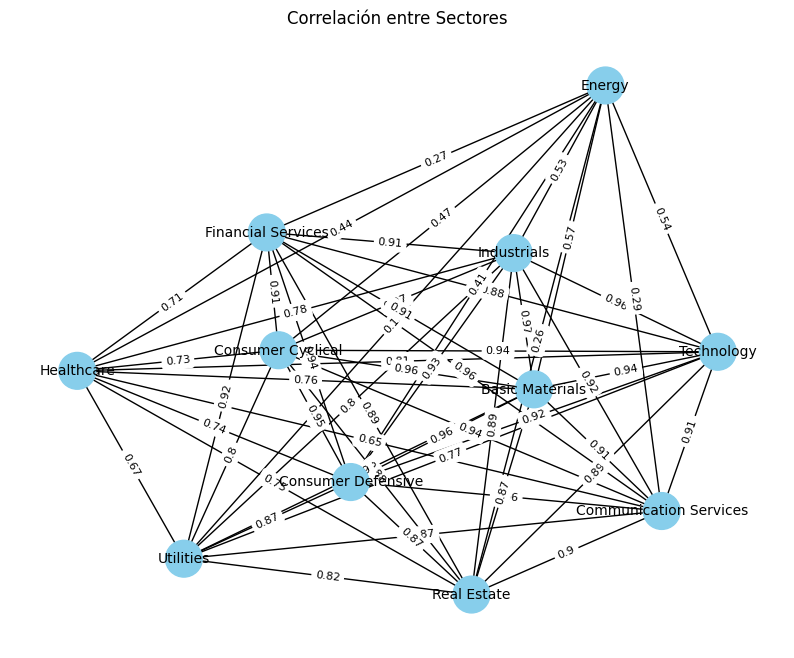

In [29]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# --- Usamos la correlación completa entre sectores ---
corr_matrix = full_corr.copy()  # o usa: correlation_in_period("YYYY-MM-DD", "YYYY-MM-DD")

# Crear grafo
G = nx.Graph()

# Agregar nodos (sectores)
sectors = corr_matrix.columns.tolist()
G.add_nodes_from(sectors)

# Crear aristas con pesos (solo si no son self-correlations y opcional: si corr > threshold)
edges = []
for i in range(len(sectors)):
    for j in range(i + 1, len(sectors)):
        sector_i = sectors[i]
        sector_j = sectors[j]
        weight = round(corr_matrix.loc[sector_i, sector_j], 2)
        edges.append((sector_i, sector_j, weight))

G.add_weighted_edges_from(edges)

n = G.number_of_nodes()

# Posiciones y colores (opcional)
pos = nx.spring_layout(G, seed=42)  # reproducible layout
colors = ["skyblue" for node in G.nodes()]

# Función para graficar el grafo
def draw_graph(G, colors, pos):
    plt.figure(figsize=(10, 8))
    nx.draw_networkx(G, node_color=colors, node_size=700, font_size=10, pos=pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=8)
    plt.title("Correlación entre Sectores")
    plt.axis("off")
    plt.show()

# Dibujar
draw_graph(G, colors, pos)


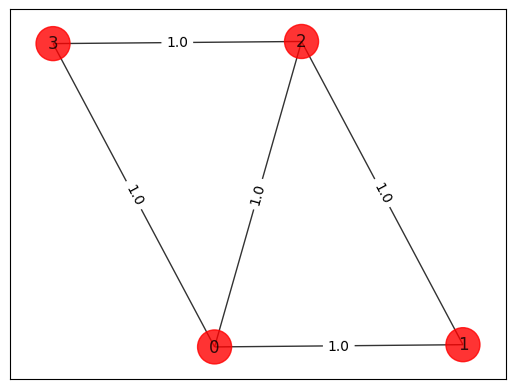

In [ ]:
# Generating a graph of 4 nodes

n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [33]:
# Computing the weight matrix from the random graph
sectors = list(G.nodes)

w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(sectors[i], sectors[j], default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

[[0.   0.96 0.78 0.97 0.53 0.91 0.92 0.8  0.93 0.97 0.89]
 [0.96 0.   0.81 0.94 0.54 0.88 0.91 0.77 0.92 0.94 0.89]
 [0.78 0.81 0.   0.73 0.44 0.71 0.65 0.67 0.74 0.76 0.75]
 [0.97 0.94 0.73 0.   0.47 0.91 0.94 0.8  0.95 0.96 0.88]
 [0.53 0.54 0.44 0.47 0.   0.27 0.29 0.15 0.41 0.57 0.26]
 [0.91 0.88 0.71 0.91 0.27 0.   0.96 0.92 0.94 0.91 0.89]
 [0.92 0.91 0.65 0.94 0.29 0.96 0.   0.87 0.96 0.91 0.9 ]
 [0.8  0.77 0.67 0.8  0.15 0.92 0.87 0.   0.87 0.79 0.82]
 [0.93 0.92 0.74 0.95 0.41 0.94 0.96 0.87 0.   0.96 0.87]
 [0.97 0.94 0.76 0.96 0.57 0.91 0.91 0.79 0.96 0.   0.87]
 [0.89 0.89 0.75 0.88 0.26 0.89 0.9  0.82 0.87 0.87 0.  ]]


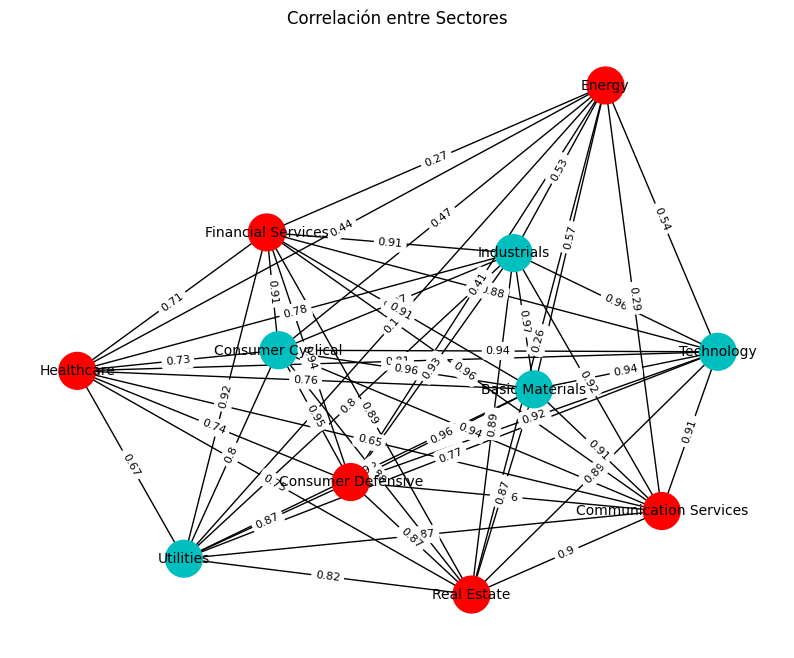


Best solution = [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0] cost = 24.070000000000007


In [42]:
best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    #print("case = " + str(x) + " cost = " + str(cost))

colors = ["r" if xbest_brute[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))

In [35]:
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -1.92*x_0*x_1 - 1.78*x_0*x_10 - 1.56*x_0*x_2 - 1.94*x_0*x_3 - 1.06*x_0*x_4
  - 1.82*x_0*x_5 - 1.84*x_0*x_6 - 1.6*x_0*x_7 - 1.86*x_0*x_8 - 1.94*x_0*x_9
  - 1.78*x_1*x_10 - 1.62*x_1*x_2 - 1.88*x_1*x_3 - 1.08*x_1*x_4 - 1.76*x_1*x_5
  - 1.82*x_1*x_6 - 1.54*x_1*x_7 - 1.84*x_1*x_8 - 1.88*x_1*x_9 - 1.5*x_2*x_10
  - 1.46*x_2*x_3 - 0.88*x_2*x_4 - 1.42*x_2*x_5 - 1.3*x_2*x_6 - 1.34*x_2*x_7
  - 1.48*x_2*x_8 - 1.52*x_2*x_9 - 1.76*x_3*x_10 - 0.94*x_3*x_4 - 1.82*x_3*x_5
  - 1.88*x_3*x_6 - 1.6*x_3*x_7 - 1.9*x_3*x_8 - 1.92*x_3*x_9 - 0.52*x_4*x_10
  - 0.54*x_4*x_5 - 0.58*x_4*x_6 - 0.3*x_4*x_7 - 0.82*x_4*x_8 - 1.14*x_4*x_9
  - 1.78*x_5*x_10 - 1.92*x_5*x_6 - 1.84*x_5*x_7 - 1.88*x_5*x_8 - 1.82*x_5*x_9
  - 1.8*x_6*x_10 - 1.74*x_6*x_7 - 1.92*x_6*x_8 - 1.82*x_6*x_9 - 1.64*x_7*x_10
  - 1.74*x_7*x_8 - 1.58*x_7*x_9 - 1.74*x_8*x_10 - 1.92*x_8*x_9 - 1.74*x_9*x_10
  + 8.66*x_0 + 8.56*x_1 + 8.02*x_10 + 7.04*x_2 + 8.549999999999999*x_3
  + 3.9299999999999997*x_4 + 8.3*x_5 + 8.31*x_6 

In [36]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -21.505000000000013
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIZ', 'IIIIIIIIIZI', 'IIIIIIIIZII', 'IIIIIIIZIII', 'IIIIIIZIIII', 'IIIIIZIIIII', 'IIIIZIIIIII', 'IIIZIIIIIII', 'IIZIIIIIIII', 'IZIIIIIIIII', 'ZIIIIIIIIII', 'IIIIIIIIIZZ', 'IIIIIIIIZIZ', 'IIIIIIIZIIZ', 'IIIIIIZIIIZ', 'IIIIIZIIIIZ', 'IIIIZIIIIIZ', 'IIIZIIIIIIZ', 'IIZIIIIIIIZ', 'IZIIIIIIIIZ', 'ZIIIIIIIIIZ', 'IIIIIIIIZZI', 'IIIIIIIZIZI', 'IIIIIIZIIZI', 'IIIIIZIIIZI', 'IIIIZIIIIZI', 'IIIZIIIIIZI', 'IIZIIIIIIZI', 'IZIIIIIIIZI', 'ZIIIIIIIIZI', 'IIIIIIIZZII', 'IIIIIIZIZII', 'IIIIIZIIZII', 'IIIIZIIIZII', 'IIIZIIIIZII', 'IIZIIIIIZII', 'IZIIIIIIZII', 'ZIIIIIIIZII', 'IIIIIIZZIII', 'IIIIIZIZIII', 'IIIIZIIZIII', 'IIIZIIIZIII', 'IIZIIIIZIII', 'IZIIIIIZIII', 'ZIIIIIIZIII', 'IIIIIZZIIII', 'IIIIZIZIIII', 'IIIZIIZIIII', 'IIZIIIZIIII', 'IZIIIIZIIII', 'ZIIIIIZIIII', 'IIIIZZIIIII', 'IIIZIZIIIII', 'IIZIIZIIIII', 'IZIIIZIIIII', 'ZIIIIZIIIII', 'IIIZZIIIIII', 'IIZIZIIIIII', 'IZIIZIIIIII', 'ZIIIZIIIIII', 'IIZZIIIIIII', 'IZIZIIIIIII', 'ZIIZIII

In [37]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result.prettyprint())

objective function value: 24.07
variable values: x_0=1.0, x_1=1.0, x_2=0.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0, x_10=0.0
status: SUCCESS


energy: -2.5650000000000026
max-cut objective: -24.070000000000014
solution: [1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
solution objective: 24.07


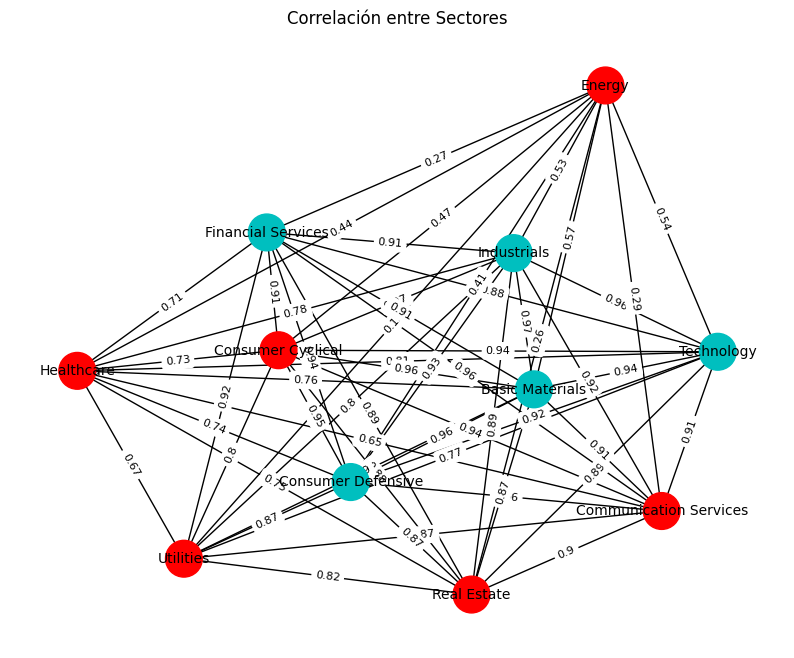

In [38]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)


<ipython-input-44-c51ebd3da35e>:4: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)


energy: -2.2955425140229164
time: 115.56995058059692
max-cut objective: -23.80054251402293
solution: [1 0 1 0 0 1 1 0 0 1 0]
solution objective: 23.990000000000002


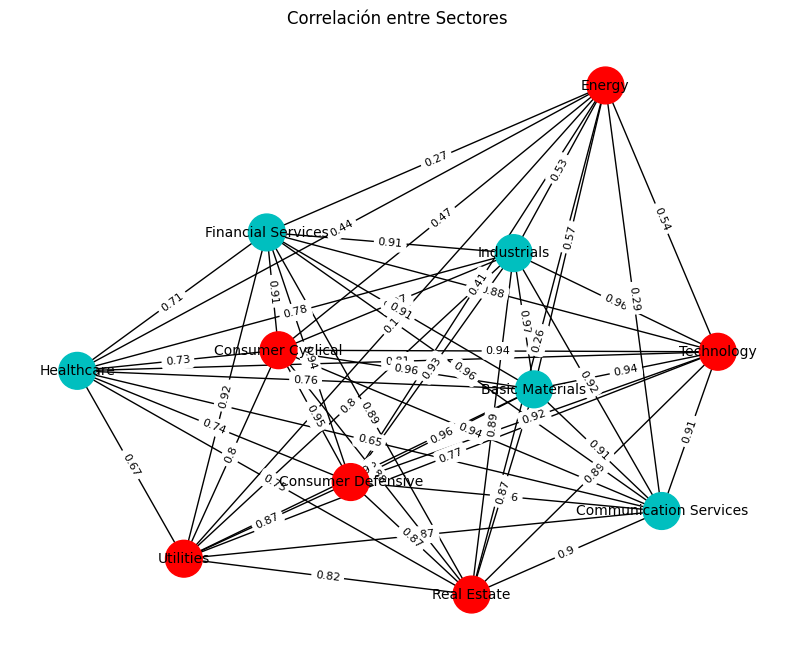

In [44]:
# construct SamplingVQE
optimizer = SPSA(maxiter=600)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=3, entanglement="full")
vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)

# run SamplingVQE
result = vqe.compute_minimum_eigenvalue(qubitOp)

# print results
x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

# plot results
colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

objective function value: 24.069999999999993
variable values: x_0=0.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=1.0, x_5=1.0, x_6=1.0, x_7=0.0, x_8=1.0, x_9=0.0, x_10=1.0
status: SUCCESS


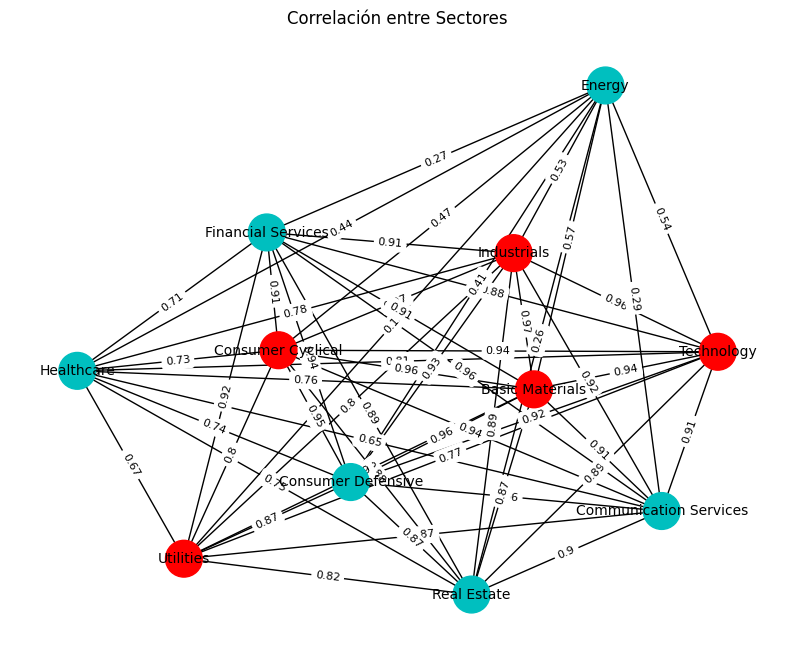

In [40]:
# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result.prettyprint())

colors = ["r" if result.x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)